* RNN의 인코더-디코더 구조는 주로 입력문장과 출력문장의 길이가 다를 경우 사용
* 대표적으로 번역기나 텍스트 요약

----------------
* sequence-to-sequence(seq2seq)는 입력된 시퀀스로부터 다른 도메인의 시퀀스를 출력하는 다양한 분야에서 사용되는 모델임
* 챗봇 또는 기계번역, 내용요약, STT(Speech to Text) 등으로 가능


### 1. 시퀀스-투-시퀀스(Sequence-to-Sequence)
---------
* seq2seq 모델의 구성

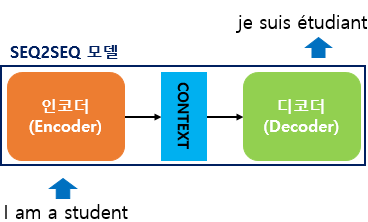



* seq2seq는 크게 인코더와 디코더의 두개 모듈로 구성됨
* 인코더는 입력문장의 단어들을 순차적으로 입력받은 뒤에 마지막에 모든 단어 정보를 압축해서 하나의 벡터로 만드는데, 이를 컨텍스트 벡터(context vector)라고 함
* 입력문장의 정보가 하나의 컨텍스트 벡터로 모두 압축되면 인코더는 컨텍스트 벡터를 디코더로 전송함
* 디코더는 컨텍스트 벡터를 받아서 번역된 단어를 한개씩 순차적으로 출력함

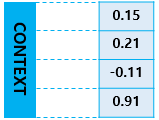

* 컨텍스트 벡터를 4개 사이즈로 표현하였지만, 실제 사용되는 seq2seq 모델에는 수백개 이상의 차원을 가짐

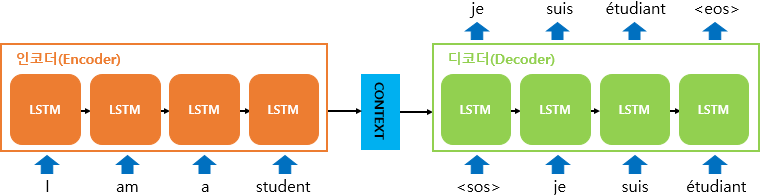

* 인코더 : 입력문장을 받는 RNN 셀(주황색)
* 디코더 : 출력문장을 출력하는 RNN 셀(초록색)
* 성능문제로 바닐라 RNN가 아닌 LSTM 또는 GRU 셀로 구성
---
#### 1-1. 인코더
* 입력문장은 단어 토큰화를 통해 단어단위로 쪼개고 단어 토큰 각각은 RNN 셀의 각 시점에 대한 입력이 됨
* 인코더 RNN 셀은 모든 단어를 입력받은 뒤, **인코더 RNN 셀의 마지막 시점의 은닉상태**를 디코더 RNN 셀을 넘겨주는데 이를 **컨텍스트 벡터**라고 함
* 이 컨텍스트 벡터는 디코더 RNN 셀의 첫번째 은닉상태로 사용됨

#### 1-2. 디코더
* RNNLM(RNN Language Model)
* 디코더는 초기입력으로 문장의 시작을 의미하는 심볼 \<sos>가 들어감
* \<sos>가 입력되면, 다음에 등장할 확률이 높은 단어를 예측하고, 첫번째 시점의 디코더 RNN 셀은 예측된 단어 je를 다음 시점의 RNN 셀의 입력으로 입력함
* 두번째 시점의 디코더 RNN 셀은 입력된 단어 je로부터 다시 다음에 올 단어인 suis를 예측하고, 또 다시 이것을 다음 시점의 RNN 셀의 입력으로 보냄

* 디코더는 이런 식으로 다음에 올 단어를 예측하고, 그 예측한 단어를 다음 시점의 RNN 셀의 입력으로 넣는 행위를 반복함
* 이 행위는 문장의 끝을 의미하는 심볼인 \<eos>가 다음 단어로 예측될 때까지 반복됨(테스트 과정)

#### 1-3. 훈련과정과 테스트 과정

* seq2seq는 훈련과정과 테스트 과정의 작동방식이 다름
* 훈련과정에서 디코더에는 인코더가 보낸 컨텍스트 벡터와 실제 정답인 \<sos>je suis etudiant를 입력받았을 때, je suis etudiant \<eos>가 나오면 정답을 알려주면서 훈련하게 됨
* 테스트 과정에서는 디코더는 **오직 컨텍스트 벡터와 \<sos>만을 입력으로 받은 후에 다음에 올 단어를 예측**하고, 그 단어를 다음 시점의 RNN 셀의 입력으로 넣는 행위를 반복함(teacher forcing)
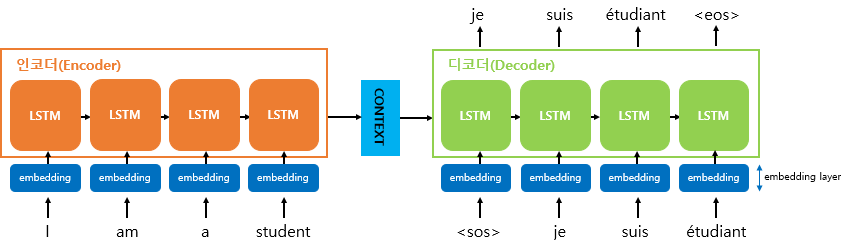

#### 1-4. 임베딩
* 자연어 처리에서 텍스트를 벡터로 바꾸는 과정
*  seq2seq에서 사용되는 모든 단어들은 임베딩 벡터로 변환 후 입력으로 사용됨(위 그림의 embedding layer과 아래 그림)

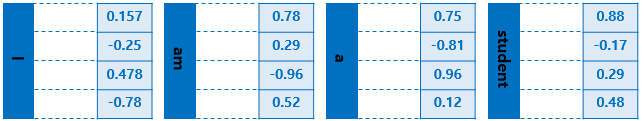

#### 1-5. RNN 셀
* 하나의 RNN 셀은 각각의 시점(time step)마다 두개의 입력을 받음

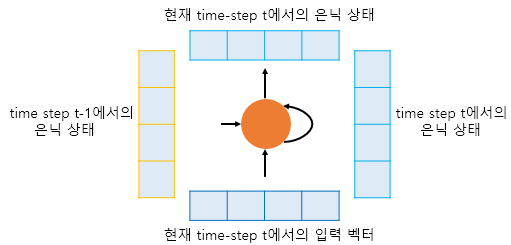

* 현재 시점(t) RNN 셀은 이전 시점(t-1)의 은닉상태와 현재시점(t)에서의 입력벡터를 받아, t의 은닉상태를 만듦
* 이 때 t의 은닉상태는 바로 위에 또 다른 은닉층이나 출력층이 존재할 경우에는 위의 층으로 보내거나, 필요없으면 값을 무시함
* 그리고 RNN 셀은 다음 시점에 해당하는 t+1 RNN 셀의 입력으로 현재 t에서의 은닉상태를 입력으로 보냄


* 이런 구조에서 현재 시점의 은닉상태는 과거 시점의 은닉상태들의 영향을 받아온 값이 됨
* 그렇기 때문에 인코더의 마지막 셀의 은닉상태에 해당하는 컨텍스트 벡터는 입력문장의 모든 단어 토큰들의 정보를 요약해서 담고 있다고 할 수 있음

#### 1-6. 디코더

* 디코더는 인코더의 마지막 RNN 셀의 은닉상태인 컨텍스트 벡터를 첫번째 은닉상태의 값으로 사용
* 디코더의 첫번째 RNN 셀은 첫번째 은닉상태의 값(컨텍스트 벡터)과 현재 t에서의 입력값인 \<sos>로부터 다음에 등장할 단어를 예측함
* 그리고 이 예측된 단어는 다음 시점인 t+1 RNN의 입력값이 되고, 이 입력값과 t의 은닉상태에서 다음 시점인 t+1의 출력벡터를 만듦. 즉, 다음에 등장할 단어를 예측함

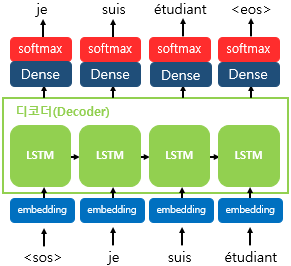


* 단어를 예측한다는 것은 즉, 소프트맥스 함수를 적용한다는 것임.
* 디코더에서 각 시점(time steps)의 RNN 셀에서 출력벡터가 나오면, 해당 벡터는 소프트맥스 함수를 통해 출력 시퀀스의 각 단어별 확률값을 변환하고, 디코더는 출력단어를 결정함

* 여기에서 컨텍스트 벡터는 디코더의 초기 은닉상태에서만 사용할 수 있는데, 이 컨텍스트 벡터를 디코더가 단어를 예측하는 매 시점마다 하나의 입력으로 사용하는 경우도 있고, 더 나아가 **어텐션(Attention) 매커니즘** 방법을 통해 컨텍스트 벡터보다 문맥을 잘 반영할 수 있도록 컨텍스트 벡터를 구하여 매 시점마다 하나의 입력으로 사용할 수도 있음

### 2. 문자 레벨 기계 번역기(Character-Level Neural Machine Translation) 구현
* 참고 : https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html

* 훈련데이터로 병렬코퍼스(두개 이상의 언어가 병렬로 구성된 코퍼스)가 필요함

    * 다운로드 링크 : http://www.manythings.org/anki

#### 2-1. 병렬 코퍼스 데이터에 대한 이해와 전처리

In [1]:
import os
import shutil
import zipfile

import pandas as pd
import tensorflow as tf
import urllib3
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [2]:
# 파일 자체 문제 발생!! --> 직접 다운로드
http = urllib3.PoolManager()
url = 'http://www.manythings.org/anki/fra-eng.zip'  # 데이터 링크
filename = 'fra-eng.zip'
path = os.getcwd()
zipfilename = os.path.join(path, filename)

with http.request('GET', url, preload_content=False) as r, open(zipfilename, 'wb') as out_file:
    shutil.copyfileobj(r, out_file)

In [3]:
# 데이터 로드
lines = pd.read_csv('fra.txt', names=['src', 'tar', 'lic'], sep='\t')
del lines['lic']
lines.shape

(208906, 2)

In [4]:
# 이중 6만개만 저장
lines = lines.loc[:, 'src': 'tar']
lines = lines[:60000]
lines.sample(10)

,src,tar
169,Be fair.,Soyez équitable !
9699,You're crafty.,Tu es rusé.
32620,Please come hungry.,"Viens, s'il te plaît, en ayant faim."
49272,You're not my mother.,Tu n'es pas ma mère.
41654,You can't handle it.,Tu ne sais pas t'y prendre.
455,Am I fat?,Suis-je gros ?
19546,I party too much.,Je fais trop la nouba.
57234,"Close the door, please.","Fermez la porte, s'il vous plaît."
32572,Nobody understands.,Personne ne comprend.
39771,The fridge is empty.,Le frigo est vide.


* 번역문장에 해당되는 프랑스어 데이터에는 시작을 의미하는 심볼 \<sos>와 종료를 의미하는 \<eos>를 넣어줘야 함
* 여기에서는 대신에 \\t를 시작심볼로, \\n을 종료심볼로 추가 

In [5]:
lines.tar = lines.tar.apply(lambda x: '\t ' + x + ' \n')
lines.sample(10)

,src,tar
37183,I forgot to ask Tom.,\t J'ai oublié de demander à Tom. \n
47409,This needs to change.,\t Il faut que ça change. \n
20653,No one was there.,\t Personne n'était là. \n
14051,He made a robot.,\t Il a fait un robot. \n
39652,That's over my head.,\t Ça me dépasse. \n
44390,I like you very much.,\t Je t'aime beaucoup. \n
48688,Who can speak French?,\t Qui peut parler français ? \n
56849,Your hands are filthy.,\t Tu as les mains sales. \n
381,Open it.,\t Ouvrez-le. \n
3500,I'm prudent.,\t Je suis prudent. \n


In [6]:
# 문자 집합 구축
src_vocab = set()
for line in lines.src:
    for char in line:
        src_vocab.add(char)
        
tar_vocab = set()
for line in lines.tar:
    for char in line:
        tar_vocab.add(char)

In [7]:
len(src_vocab)

79

In [8]:
src_vocab_size = len(src_vocab) + 1
tar_vocab_size = len(tar_vocab) + 1

print(src_vocab_size, tar_vocab_size) # 영어와 프랑스 각각 80개, 104개 존재

80 104


In [9]:
src_vocab = sorted(list(src_vocab))
tar_vocab = sorted(list(tar_vocab))
print(src_vocab[45:75])
print(tar_vocab[45:75])

['W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
['T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w']


* 문자집합에 문자단위로 저장되었으며, 각 문자에 인텍스를 부여함

In [10]:
src_to_index = dict([(word, i+1) for i, word in enumerate(src_vocab)])
tar_to_index = dict([(word, i+1) for i, word in enumerate(tar_vocab)])
print(src_to_index)
print(tar_to_index)

{' ': 1, '!': 2, '"': 3, '$': 4, '%': 5, '&': 6, "'": 7, ',': 8, '-': 9, '.': 10, '/': 11, '0': 12, '1': 13, '2': 14, '3': 15, '4': 16, '5': 17, '6': 18, '7': 19, '8': 20, '9': 21, ':': 22, '?': 23, 'A': 24, 'B': 25, 'C': 26, 'D': 27, 'E': 28, 'F': 29, 'G': 30, 'H': 31, 'I': 32, 'J': 33, 'K': 34, 'L': 35, 'M': 36, 'N': 37, 'O': 38, 'P': 39, 'Q': 40, 'R': 41, 'S': 42, 'T': 43, 'U': 44, 'V': 45, 'W': 46, 'X': 47, 'Y': 48, 'Z': 49, 'a': 50, 'b': 51, 'c': 52, 'd': 53, 'e': 54, 'f': 55, 'g': 56, 'h': 57, 'i': 58, 'j': 59, 'k': 60, 'l': 61, 'm': 62, 'n': 63, 'o': 64, 'p': 65, 'q': 66, 'r': 67, 's': 68, 't': 69, 'u': 70, 'v': 71, 'w': 72, 'x': 73, 'y': 74, 'z': 75, '°': 76, 'é': 77, '’': 78, '€': 79}
{'\t': 1, '\n': 2, ' ': 3, '!': 4, '"': 5, '$': 6, '%': 7, '&': 8, "'": 9, '(': 10, ')': 11, ',': 12, '-': 13, '.': 14, '0': 15, '1': 16, '2': 17, '3': 18, '4': 19, '5': 20, '6': 21, '7': 22, '8': 23, '9': 24, ':': 25, '?': 26, 'A': 27, 'B': 28, 'C': 29, 'D': 30, 'E': 31, 'F': 32, 'G': 33, 'H': 3

In [11]:
len(src_to_index), len(tar_to_index)

(79, 103)

* 인덱스가 부여된 문자집합으로부터 갖고 있는 훈련데이터에 정수 인코딩을 수행함
* 우선, 인코더의 입력이 될 영어문장 샘플에 대해 정수 인코딩을 수행

In [12]:
encoder_input = []
# 1개의 문장
for line in lines.src:
    encoded_line = []
    # 각 줄에서 1개의 char
    for char in line:
        # 각 char를 정수로 변환
        encoded_line.append(src_to_index[char])
    encoder_input.append(encoded_line)
    
print('source 문자의 정수 인코딩 :', encoder_input[:5])

source 문자의 정수 인코딩 : [[30, 64, 10], [30, 64, 10], [30, 64, 10], [30, 64, 10], [31, 58, 10]]


In [13]:
lines.src[:5]

0    Go.
1    Go.
2    Go.
3    Go.
4    Hi.
Name: src, dtype: object

* 디코더의 입력이 될 프랑스어 데이터에 대해 정수인코딩 수행

In [14]:
decoder_input = []
for line in lines.tar:
    decoded_line = []
    for char in line:
        decoded_line.append(tar_to_index[char])
    decoder_input.append(decoded_line)
    
print('target 문자의 정수 인코딩 :', decoder_input[:5])

target 문자의 정수 인코딩 : [[1, 3, 48, 53, 3, 4, 3, 2], [1, 3, 39, 53, 70, 55, 60, 57, 14, 3, 2], [1, 3, 31, 66, 3, 70, 67, 73, 72, 57, 3, 4, 3, 2], [1, 3, 28, 67, 73, 59, 57, 3, 4, 3, 2], [1, 3, 45, 53, 64, 73, 72, 3, 4, 3, 2]]


In [15]:
lines.tar[:5]

0          \t Va ! \n
1       \t Marche. \n
2    \t En route ! \n
3       \t Bouge ! \n
4       \t Salut ! \n
Name: tar, dtype: object

* 여기에 추가로 정수인코딩 필요. 디코더의 예측값과 비교하기 위한 실제값이 필요함
* 그런데 이 실제값에는 시작 심볼에 해당되는 \<sos>가 필요 없음
* 따라서 이번 정수 인코딩에서는 \<sos>에 해당하는 \\t를 제거함

In [16]:
decoder_target = []
for line in lines.tar:
    timestep = 0
    decoded_line = []
    for char in line:
        if timestep > 0:
            decoded_line.append(tar_to_index[char])
        timestep += 1
    decoder_target.append(decoded_line)
print('target 문장 레이블의 정수 인코딩 :', decoder_target[:5])

target 문장 레이블의 정수 인코딩 : [[3, 48, 53, 3, 4, 3, 2], [3, 39, 53, 70, 55, 60, 57, 14, 3, 2], [3, 31, 66, 3, 70, 67, 73, 72, 57, 3, 4, 3, 2], [3, 28, 67, 73, 59, 57, 3, 4, 3, 2], [3, 45, 53, 64, 73, 72, 3, 4, 3, 2]]


* \\t 인덱스가 1이므로 1이 모두 제거됨 
* 다음은 패딩 작업을 수행함. 패딩을 위해 영어문장과 프랑스어 문장 각각에 대해 가장 길이가 긴 샘플의 길이 확인

In [17]:
max_src_len_0 = max([len(src) for src in encoder_input])
max_src_len = max([len(src) for src in lines.src])
print(max_src_len_0, max_src_len)

max_tar_len_0 = max([len(tar) for tar in decoder_input])
max_tar_len = max([len(tar) for tar in lines.tar])
print(max_tar_len_0, max_tar_len)

23 23
76 76


In [18]:
# 여기에서는 영어 23, 프랑스어 76으로 각각 맞춰 패딩 수행
encoder_input = pad_sequences(encoder_input, maxlen=max_src_len, padding='post')
decoder_input = pad_sequences(decoder_input, maxlen=max_tar_len, padding='post')
decoder_target = pad_sequences(decoder_target, maxlen=max_tar_len, padding='post')

In [19]:
encoder_input[:1]

array([[30, 64, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0]])

In [20]:
# 모든 값에 대해 원-핫 인코딩을 수행함
encoder_input = to_categorical(encoder_input)
decoder_input = to_categorical(decoder_input)
decoder_target = to_categorical(decoder_target)

In [21]:
encoder_input[:1]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]]], dtype=float32)

#### 2-2. 교사강요(Teacher Forcing)

* 현재 시점의 디코더 셀의 입력은 오직 디코더 셀의 출력을 입력으로 받는다고 했는데 왜 decoder_input이 필요할까
* 훈련과정에서 이전 시점의 디코더 셀의 출력을 현재 시점의 디코더 셀의 입력으로 넣어주지 않고, 이전 시점의 실제값을 현재 시점의 디코더 셀의 입력값으로 주는 방법임
* 이유는 이전 시점의 디코더 셀의 예측이 틀렸음에도 사용하게 되면 잘못된 훈련이 될 수 있기 때문임


#### 2-3. seq2seq 기계번역기 훈련

In [22]:
from tensorflow.keras.layers import Input,LSTM, Embedding, Dense
from tensorflow.keras.models import Model
import numpy as np

In [27]:
src_vocab_size, tar_vocab_size

(80, 104)

In [24]:
# numpy version 수정함
encoder_inputs = Input(shape=(None, src_vocab_size))
encoder_lstm = LSTM(units=256, return_state=True)

# encoder_outputs은 여기에서 불필요함
encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)  

# LSTM은 바닐라 RNN과는 달리 상태가 두개를 반환함(은닉상태와 셀 상태)
encoder_states = [state_h, state_c]

* 은닉상태의 크기는 256으로 설정
* 인코더의 내부상태를 디코더로 넘겨주어야 하기 때문에 return_state=True로 설정
* 인코더에 입력을 넣으면 내부상태를 리턴함

---
* LSTM에서 state_h, state_c를 리턴 받고, 이 두가지 상태를 디코더에 전달하기 위해 encoder_states에 저장
* 이것이 컨텍스트 벡터임

In [35]:
decoder_inputs = Input(shape=(None, tar_vocab_size))
decoder_lstm = LSTM(units=256, return_sequences=True, return_state=True)

# 디코더에게 인코더의 은닉상태, 셀상태(encoder_states) 전달 
# ==> 인코더의 마지막 은닉상태를 디코더의 초기은닉상태로 사용
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)

decoder_softmax_layer = Dense(tar_vocab_size, activation='softmax')
decoder_outputs = decoder_softmax_layer(decoder_outputs)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

* 디코더의 은닉상태 크기도 256으로 설정
* 디코더의 은닉상태, 셀상태를 리턴하기는 하지만 훈련과정에서는 사용하지 않음
* 그 후 바로 예측을 위한 소프트맥스 함수를 통해 실제값의 오차를 구함

In [36]:
# decoder_outputs을 사용하지 않고, 대신에 decoder_target 사용
model.fit(x=[encoder_input, decoder_input], y=decoder_target, batch_size=64, epochs=40, validation_split=0.2)

Epoch 1/40
750/750 [==============================] - 219s 292ms/step - loss: 0.7491 - val_loss: 0.6553
Epoch 2/40
750/750 [==============================] - 260s 347ms/step - loss: 0.4560 - val_loss: 0.5295
Epoch 3/40
750/750 [==============================] - 278s 370ms/step - loss: 0.3817 - val_loss: 0.4693
Epoch 4/40
750/750 [==============================] - 268s 357ms/step - loss: 0.3386 - val_loss: 0.4270
Epoch 5/40
750/750 [==============================] - 258s 344ms/step - loss: 0.3094 - val_loss: 0.4020
Epoch 6/40
750/750 [==============================] - 233s 311ms/step - loss: 0.2881 - val_loss: 0.3891
Epoch 7/40
750/750 [==============================] - 259s 345ms/step - loss: 0.2717 - val_loss: 0.3747
Epoch 8/40
750/750 [==============================] - 230s 307ms/step - loss: 0.2586 - val_loss: 0.3693
Epoch 9/40
750/750 [==============================] - 255s 341ms/step - loss: 0.2477 - val_loss: 0.3591
Epoch 10/40
750/750 [==============================] - 230s 306m

* 인코더 입력과 디코더 입력(원래 데이터)이 들어가고, 디코더의 실제값인 decoder_target이 반영됨
* 배치크기 : 64
* 에포크 : 40

----
* 여기에서 설정한 배치크기와 에포크는 실제 훈련데이터에 대해 과적합 상태 발생시킴
* 중간부터 검증데이터에 대한 오차인 val_loss 값이 다시 올라감

#### 2-4. seq2seq 기계번역기 동작
-------------
* 번역동작 단계 정리
    1. 번역하고자 하는 입력문장이 인코더에 들어가서 은닉상태와 셀상태를 얻음
    2. 상태와 \<SOS>에 해당하는 \\t를 디코더로 보냄
    3. 디코더가 \<EOS>에 해당하는 \\n이 나올때까지 다음 문자 예측을 반복함

In [37]:
# 인코더 먼저 정의
encoder_model = Model(inputs=encoder_inputs, outputs=encoder_states)

In [40]:
# 디코더 설계

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(256,)) 
decoder_state_input_c = Input(shape=(256,))
decoder_state_inputs = [decoder_state_input_h, decoder_state_input_c]

# 다음 단어를 예측하기 위해 초기상태(initial state)를 이전 시점의 상태로 사용
# 뒤의 함수 decode_sequence()에 동작을 구현 
decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_state_inputs)

# 훈련과정과 달리, LSTM이 리턴하는 은닉상태와 셀상태를 버리지 않음
decoder_states = [state_h, state_c]
decoder_outputs = decoder_softmax_layer(decoder_outputs)
decoder_model = Model(inputs=[decoder_inputs] + decoder_state_inputs, outputs=[decoder_outputs] + decoder_states)

In [41]:
# 인텍스로부터 단어를 얻을 수 있도록 변수 만듦
index_to_src = dict((i, char) for char, i in src_to_index.items())
index_to_tar = dict((i, char) for char, i in tar_to_index.items())

In [42]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    states_value = encoder_model.predict(input_seq)
    
    # <SOS>에 해당하는 원-핫 벡터 생성
    target_seq = np.zeros((1, 1, tar_vocab_size))
    target_seq[0, 0, tar_to_index['\t']] = 1.
    
    stop_condition = False
    decoded_sentence = ""
    
    # stop_condition이 True가 될 때까지 루프 반복
    while not stop_condition:
        # 이전 시점의 상태 states_value를 현 시점의 초기상태로 사용
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        
        # 예측 결과를 문자로 변환
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = index_to_tar[sampled_token_index]
        
        # 현재 시점의 예측 문자를 예측 문장에 추가
        decoded_sentence += sampled_char
        
        # <eos>에 도달하거나 최대 길이를 넘으면 중단
        if (sampled_char == '\n' or len(decoded_sentence) > max_tar_len):
            stop_condition = True
            
        # 현재 시점의 예측결과를 다음 시점의 입력으로 사용하기 위해 저장
        target_seq = np.zeros((1, 1, tar_vocab_size))
        target_seq[0, 0, sampled_token_index] = 1.
        
        # 현재 시점의 상태를 다음 시점의 상태로 사용하기 위해 저장
        states_value = [h, c]
        
    return decoded_sentence

In [52]:
for seq_index in [3, 50, 100, 300, 1001]:  # 입력문장 인덱스
    input_seq = encoder_input[seq_index: seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    print("-" * 35)
    print('입력문장 :', lines.src[seq_index])
    print('정답 문장 :', lines.tar[seq_index][2:len(lines.tar[seq_index])-1]) # \t와 \n 빼고 출력
    print('번역 문장 :', decoded_sentence[1:len(decoded_sentence)-1])

-----------------------------------
입력문장 : Go.
정답 문장 : Bouge ! 
번역 문장 : Va ! 
-----------------------------------
입력문장 : Hello!
정답 문장 : Bonjour ! 
번역 문장 : Bonjour ! 
-----------------------------------
입력문장 : Got it!
정답 문장 : Compris ! 
번역 문장 : Avant ! 
-----------------------------------
입력문장 : Goodbye.
정답 문장 : Ciao. 
번역 문장 : Commence. 
-----------------------------------
입력문장 : He is old.
정답 문장 : Il est vieux. 
번역 문장 : Il est vieux. 


* 지금까지는 문자단위에서 단어 단위로 확장해서 기계번역기를 구현한 사례임